In [1]:
# add ../../utils to the path
import sys
sys.path.append('../../utils')

from src_rec_file_helper import *

# read file
fpath = "./OUTPUT_FILES/src_rec_file_forward.dat"
df_events, df_recs = read_src_rec_file(fpath, no_epi_dist=True)

read file:  ./OUTPUT_FILES/src_rec_file_forward.dat
number of events:  100
number of recs:  400


In [2]:
df_events

,id_src,id_rec,year,month,day,hour,min,sec,lat,lon,dep,mag,nrec,id_event,data_source,phase,epi_dist,arr_time,name_rec,datetime
0,0,None,1998,1,1,0,0,0.0,29.65,14.90,270.9,3.0,4,1000,0,None,None,None,None,1998-01-01
1,1,None,1998,1,1,0,0,0.0,29.65,17.42,270.9,3.0,4,1000,0,None,None,None,None,1998-01-01
2,2,None,1998,1,1,0,0,0.0,29.65,19.94,270.9,3.0,4,1000,0,None,None,None,None,1998-01-01
3,3,None,1998,1,1,0,0,0.0,29.65,22.46,270.9,3.0,4,1000,0,None,None,None,None,1998-01-01
4,4,None,1998,1,1,0,0,0.0,29.65,24.98,270.9,3.0,4,1000,0,None,None,None,None,1998-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,None,1998,1,1,0,0,0.0,48.28,27.50,270.9,3.0,4,1000,0,None,None,None,None,1998-01-01
96,96,None,1998,1,1,0,0,0.0,48.28,30.02,270.9,3.0,4,1000,0,None,None,None,None,1998-01-01
97,97,None,1998,1,1,0,0,0.0,48.28,32.54,270.9,3.0,4,1000,0,None,None,None,None,1998-01-01
98,98,None,1998,1,1,0,0,0.0,48.28,35.06,270.9,3.0,4,1000,0,None,None,None,None,1998-01-01


In [3]:
# copy event list
import copy
df_events_ori = copy.deepcopy(df_events)

In [4]:
# modify source location
# slightly shift the source location towards the center of the domain
import math

tt1=(30.0-1.5)
tt2=(50.0+1.5)
pp1=(15.0-1.5)
pp2=(40.0+1.5)

center_lon = (pp1+pp2)/2
center_lat = (tt1+tt2)/2

# shift amount is 5 %
factor_shift =  0.05

# shift direction vector
for i in range(len(df_events)):
    v_lon = center_lon - df_events.loc[i, "lon"]
    v_lat = center_lat - df_events.loc[i, "lat"]

    df_events.loc[i, "lon"] += v_lon * factor_shift
    df_events.loc[i, "lat"] += v_lat * factor_shift


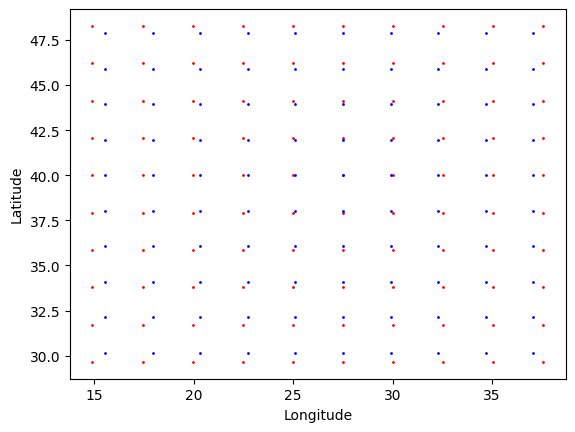

In [5]:
# plot original and modified source location
import matplotlib.pyplot as plt

for i in range(len(df_events_ori)):
    plt.plot(df_events_ori.loc[i, "lon"], df_events_ori.loc[i, "lat"], color="red", marker="o", markersize=1)

for i in range(len(df_events)):
    plt.plot(df_events.loc[i, "lon"], df_events.loc[i, "lat"], color="blue", marker="o", markersize=1)

plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

In [6]:
# write out
fpath="src_rec_test_out_modified.dat"
write_src_rec_file(df_events, df_recs, fpath)

write file:  src_rec_test_out_modified.dat


100%|██████████| 100/100 [00:00<00:00, 742.86it/s]
